# **Aprendizado de Máquina Não Supervisionado**

### Nome: Alexandre dos Santos Gualberto 
### Curso: Engenharia de Computação

## **Customers Dataset** 
### link: https://www.kaggle.com/datasets/datascientistanna/customers-dataset


 ### Atributos:
    1 - Customers ID (Id dos consumidores)
    2 - Gender (Gênero 'Male' ou 'Female')
    3 - Age (idade)
    4 - Annual Income (salário anual)
    5 - Spending Score (pontuação de 1 à 100 dada ao consumidor pela loja baseada em comportamento e na forma como o mesmo consome)
    6 - Profession (profissão)
    7 - Work Experience (experiência profissional em anos)
    8 - Family Size (tamanho da família)
   
  
  

### Conjunto de Dados e Tratamento de Dados

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('Customers.csv') # lê o arquivo com os dados 

In [ ]:
dados.head() # Visualização do DataFrame

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


Ao analisar o DataFrame percebe-se que algumas linhas não possuem valor espepecificado para o atributo 'Profession', por isso tratarei esses dados faltantes atribuindo o valor 'Not specified' para este atributo.

In [ ]:
dados = dados.fillna({'Profession': 'Not specified'}) # Substitui os valores nulos por 'Not specified'

In [ ]:
list(dados['Profession'].drop_duplicates()) # lista dos possíveis valores para o campo após o tratamento de dados faltantes

['Healthcare',
 'Engineer',
 'Lawyer',
 'Entertainment',
 'Artist',
 'Executive',
 'Doctor',
 'Homemaker',
 'Marketing',
 'Not specified']

In [ ]:
# Transformação dos dados nominais em binários 
dados = pd.get_dummies(dados, columns = ['Gender', 'Profession']) 

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalização dos dados menos CustomerID que funciona como indice
scaler = MinMaxScaler()
dados[['Age', 'Annual Income ($)','Spending Score (1-100)','Work Experience','Family Size']] = scaler.fit_transform(dados[['Age', 'Annual Income ($)','Spending Score (1-100)','Work Experience','Family Size']])

In [ ]:
dados

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Not specified
0,1,0.191919,0.078958,0.39,0.058824,0.375,0,1,0,0,0,0,0,1,0,0,0,0
1,2,0.212121,0.184236,0.81,0.176471,0.250,0,1,0,0,1,0,0,0,0,0,0,0
2,3,0.202020,0.452694,0.06,0.058824,0.000,1,0,0,0,1,0,0,0,0,0,0,0
3,4,0.232323,0.310569,0.77,0.000000,0.125,1,0,0,0,0,0,0,0,0,1,0,0
4,5,0.313131,0.200027,0.40,0.117647,0.625,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,0.717172,0.970591,0.40,0.470588,0.750,1,0,1,0,0,0,0,0,0,0,0,0
1996,1997,0.919192,0.385095,0.32,0.411765,0.750,1,0,0,1,0,0,0,0,0,0,0,0
1997,1998,0.878788,0.478808,0.14,0.529412,0.125,0,1,0,0,0,0,0,1,0,0,0,0
1998,1999,0.777778,0.958600,0.04,0.411765,0.125,0,1,0,0,0,0,1,0,0,0,0,0


### Determinação do melhor número de grupos para o conjunto de dados

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Para esse conjunto de dados será utilizado um intervalo de k variando de 2 a 15.

In [ ]:
# Função que retorna dois vetores um que armazena os indices de soma quadrática das distâncias e o outro que armazena quantos grupos foram utilizados
# perceba que ele armazena os dados de k iterações
def encontra_k(df):
    
    indice_soma_quadraticas = []
    valor_k = []
    
    for k in range(2, 16):
        
        modelo_kmean = KMeans(n_clusters = k, n_init = 'auto')
        modelo_kmean.fit(df)
        
        indice_soma_quadraticas.append(modelo_kmean.inertia_)
        valor_k.append(k)
        
    
    return indice_soma_quadraticas, valor_k

In [ ]:
# Função que realiza o plot do gráfico cotovelo
def elbow_plot(indice_soma_quadraticas, valor_k):
    
    figure = plt.subplots(figsize = (16, 8))
    plt.plot(valor_k, indice_soma_quadraticas, 'o-', color = 'blue')
    plt.xlabel("K")
    plt.ylabel("Soma dos Quadrados das Distâncias")
    plt.title("Gráfico cotovelo")
    plt.show()

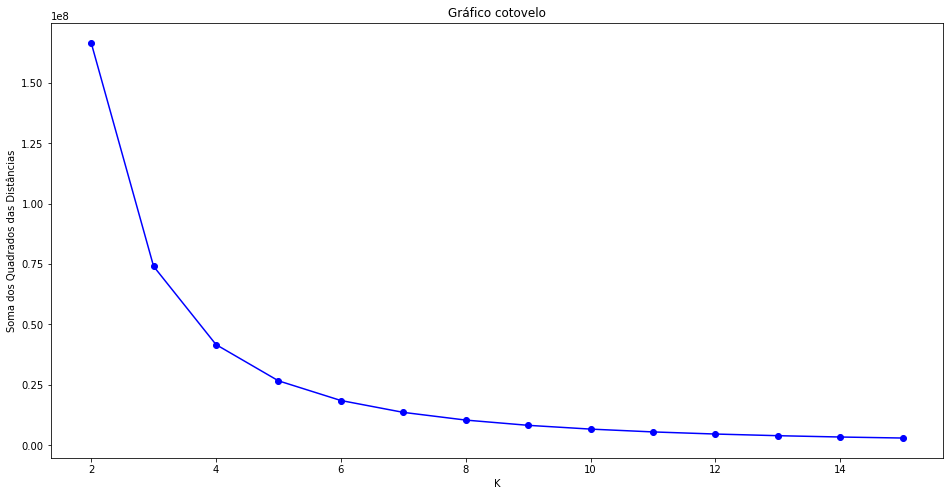

In [ ]:
indice_soma_quadraticas, valor_k = encontra_k(dados)

elbow_plot(indice_soma_quadraticas, valor_k)

Perceba pelo gráfico que a variação da soma dos quadrados da distância decrescem rápidamente até chegar no valor de k = 5. Portanto, fica determinado que o melhor número de grupos para este Dataset é 5.

**Melhor número k de grupos para o conjunto de dados, k = 5.**